## 说明

请按照填空顺序编号分别完成 参数优化，不同基函数的实现

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        return np.asarray(xs), np.asarray(ys)#返回两个数组

## 不同的基函数 (basis function)的实现 填空顺序 2

请分别在这里实现“多项式基函数”以及“高斯基函数”

其中以及训练集的x的范围在0-25之间

In [58]:
def identity_basis(x):
    """
    恒等基函数（线性基函数）
    
    这是最简单的基函数，直接返回输入特征本身。
    用于线性回归中的线性特征变换。
    
    Args:
        x (numpy.ndarray): 输入数据，形状为 (N,)，其中N是样本数量
        
    Returns:
        numpy.ndarray: 扩展维度后的特征矩阵，形状为 (N, 1)
                      每个样本对应一个特征（即原始x值）
    
    Example:
        输入: x = [1, 2, 3]  # 形状 (3,)
        输出: [[1], [2], [3]]  # 形状 (3, 1)
    """
    # 将一维数组扩展为二维矩阵，axis=1表示在第1个维度上增加维度
    # 从形状(N,) 变为 (N, 1)，便于后续矩阵运算
    ret = np.expand_dims(x, axis=1)
    return ret


def multinomial_basis(x, feature_num=10):
    """
    多项式基函数
    
    将输入特征x扩展为多项式特征 [x^0, x^1, x^2, ..., x^(feature_num-1)]。
    这样可以拟合非线性关系，提高模型的表达能力。
    
    Args:
        x (numpy.ndarray): 输入数据，形状为 (N,)，其中N是样本数量
        feature_num (int): 多项式的阶数，默认为10
                          生成的特征为 x^0, x^1, ..., x^(feature_num-1)
        
    Returns:
        numpy.ndarray: 多项式特征矩阵，形状为 (N, feature_num)
                      每行包含一个样本的所有多项式特征
    
    Example:
        输入: x = [2, 3], feature_num = 3
        输出: [[1, 2, 4],    # [2^0, 2^1, 2^2]
               [1, 3, 9]]    # [3^0, 3^1, 3^2]
    
    Note:
        多项式基函数适用于拟合平滑的非线性曲线，
        但要注意高阶多项式可能导致过拟合。
    """
    # 将输入扩展为列向量，形状从 (N,) 变为 (N, 1)
    x = np.expand_dims(x, axis=1)  # shape(N, 1)

    # 初始化结果矩阵，形状为 (N, feature_num)
    ret = np.zeros((x.shape[0], feature_num))
    
    # 生成多项式特征：x^0, x^1, x^2, ..., x^(feature_num-1)
    for i in range(feature_num):
        ret[:, i] = (x[:, 0] ** i)
    return ret


def gaussian_basis(x, feature_num=10):
    """
    高斯基函数（径向基函数 RBF）
    
    使用高斯函数作为基函数，形式为 exp(-((x - μ_i) / σ)^2)。
    其中 μ_i 是第i个高斯函数的中心，σ 是标准差。
    高斯基函数能够很好地处理局部特征。
    
    Args:
        x (numpy.ndarray): 输入数据，形状为 (N,)，其中N是样本数量
        feature_num (int): 高斯基函数的数量，默认为10
                          即使用 feature_num 个不同中心的高斯函数
        
    Returns:
        numpy.ndarray: 高斯特征矩阵，形状为 (N, feature_num)
                      每列对应一个高斯基函数的输出
    
    Example:
        对于输入 x 和 feature_num 个高斯中心，
        输出每个样本在各个高斯函数下的响应值。
    
    Note:
        - 高斯中心通常均匀分布在输入数据的范围内（0-25）
        - 标准差σ影响高斯函数的宽度，需要合理选择
        - 高斯基函数适合拟合局部变化的非线性关系
    """
    # 根据训练集x的范围(0-25)，均匀设置feature_num个高斯中心
    centers = np.linspace(0, 25, feature_num)
    
    # 设置标准差，影响高斯函数的宽度
    # 选择合适的σ值，使相邻高斯函数有适当的重叠
    sigma = (25 - 0) / (feature_num - 1) * 1.5  # 1.5倍的中心间距
    
    # 初始化结果矩阵，形状为 (N, feature_num)
    ret = np.zeros((len(x), feature_num))
    
    # 计算每个样本在各个高斯函数下的值
    for i in range(feature_num):
        # 高斯函数公式：exp(-((x - center_i) / sigma)^2)
        ret[:, i] = np.exp(-((x - centers[i]) / sigma) ** 2)
    
    return ret

## 返回一个训练好的模型 填空顺序 1 用最小二乘法进行模型优化 
## 填空顺序 3 用梯度下降进行模型优化
> 先完成最小二乘法的优化 (参考书中第二章 2.3中的公式)

> 再完成梯度下降的优化   (参考书中第二章 2.3中的公式)

在main中利用训练集训练好模型的参数，并且返回一个训练好的模型。

计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w

In [59]:
def main(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    
    """
    # 选择基函数类型：这里使用恒等基函数（线性基函数）
    basis_func = identity_basis
    #basis_func = multinomial_basis
    # 创建偏置项（截距项）phi0
    # np.ones_like(x_train) 创建与 x_train 相同形状的全1数组
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)
    # 使用基函数处理输入特征 x_train
    # 对于 identity_basis，这一步会将 x_train 转换为列向量
    phi1 = basis_func(x_train)
    # 将偏置项和特征项水平拼接，构成完整的设计矩阵
    # axis=1 表示沿着列的方向拼接（水平拼接）
    # 最终得到的 phi 矩阵形状为 (样本数, 特征数+1)
    # 例如：phi = [[1, 1], [1, 2], [1, 3]]第一列是偏置项，第二列是原始特征
    phi = np.concatenate([phi0, phi1], axis=1)
    
    # 方法1：最小二乘法 (Least Squares Method)
    # 第1步：计算设计矩阵的转置
    # phi.T 的形状: (特征数, 样本数)
    phi_transpose = phi.T
    print(f"phi形状: {phi.shape}")
    print(f"phi转置形状: {phi_transpose.shape}")
    # 第2步：计算 φᵀφ (这是一个对称矩阵)
    # 结果形状: (特征数, 特征数)
    phi_T_phi = np.dot(phi_transpose, phi)
    print(f"φᵀφ 形状: {phi_T_phi.shape}")
    # 第3步：计算逆矩阵 (φᵀφ)⁻¹
    # 这一步要求 φᵀφ 是可逆的（非奇异矩阵）
    phi_T_phi_inverse = np.linalg.inv(phi_T_phi)
    # 第4步：计算 φᵀy
    # 结果形状: (特征数,)
    phi_T_y = np.dot(phi_transpose, y_train)
    print(f"φᵀy 形状: {phi_T_y.shape}")
    # 第5步：最终计算权重
    # w = (φᵀφ)⁻¹φᵀy
    w = np.dot(phi_T_phi_inverse, phi_T_y)
    print(f"权重w形状: {w.shape}")
    print(f"权重w: {w}")

    #==========
    
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y

    return f

(300,)
(200,)
phi形状: (300, 2)
phi转置形状: (2, 300)
φᵀφ 形状: (2, 2)
φᵀy 形状: (2,)
权重w形状: (2,)
权重w: [0.62680273 0.94732599]
训练集预测值与真实值的标准差：2.0
预测值与真实值的标准差：2.2


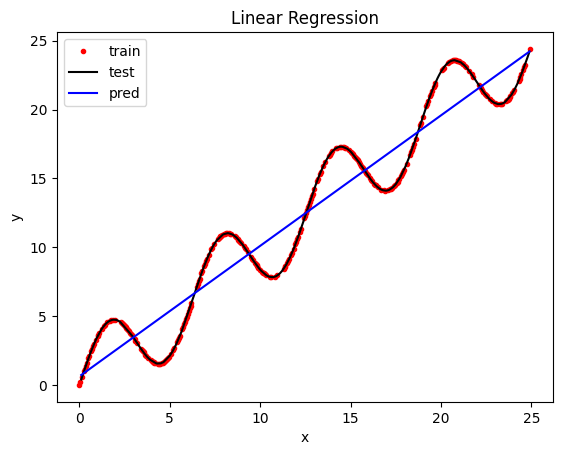

In [60]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
    plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'b')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()

## 填空顺序 3 用梯度下降进行模型优化

In [61]:
def main(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    
    """
    basis_func = identity_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)
    phi1 = basis_func(x_train)
    phi = np.concatenate([phi0, phi1], axis=1)
    
    # 方法2：梯度下降法 (Gradient Descent Method)
    # 第1步：初始化参数
    w = np.random.normal(0, 1, phi.shape[1])  # 形状为 (特征数,)
    print(f"phi形状: {phi.shape}")
    print(f"初始权重w形状: {w.shape}")
    print(f"初始权重w: {w}")
    
    # 第2步：设置超参数
    learning_rate = 0.00001    # 学习率
    num_iterations = 1000   # 迭代次数
    print(f"学习率: {learning_rate}")
    print(f"迭代次数: {num_iterations}")
    
    # 第3步：梯度下降迭代优化
    for i in range(num_iterations):
        # 第3.1步：前向传播 - 计算当前权重下的预测值
        # y_pred = φw，形状为 (样本数,)
        y_pred = np.dot(phi, w)
        
        # 第3.2步：计算损失函数的梯度
        # 损失函数：L = 1/2 * ||φw - y||²
        # 梯度公式：∇w = φᵀ(φw - y)
        # 误差向量：φw - y，形状为 (样本数,)
        error = y_pred - y_train
        # 梯度计算：φᵀ × error，形状为 (特征数,)
        gradient = np.dot(phi.T, error)
        
        # 第3.3步：更新权重参数
        # 权重更新规则：w = w - α∇w
        # α 是学习率，∇w 是梯度
        w = w - learning_rate * gradient
        
        # 第3.4步：每100次迭代打印一次损失（可选）
        if (i + 1) % 200 == 0:
            loss = 0.5 * np.mean(error ** 2)  # 均方误差损失
            print(f"迭代 {i+1}: 损失 = {loss:.4f}")
    
    # 第4步：输出最终结果
    print(f"最终权重w形状: {w.shape}")
    print(f"最终权重w: {w}")
    
    #==========
    
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y

    return f

## 评估结果 
> 没有需要填写的代码，但是建议读懂

(300,)
(200,)
phi形状: (300, 2)
初始权重w形状: (2,)
初始权重w: [-1.18953475  1.88258682]
学习率: 1e-05
迭代次数: 1000
迭代 200: 损失 = 2.4161
迭代 400: 损失 = 2.3269
迭代 600: 损失 = 2.2615
迭代 800: 损失 = 2.2137
迭代 1000: 损失 = 2.1787
最终权重w形状: (2,)
最终权重w: [-0.22930296  0.99990193]
训练集预测值与真实值的标准差：2.1
预测值与真实值的标准差：2.2


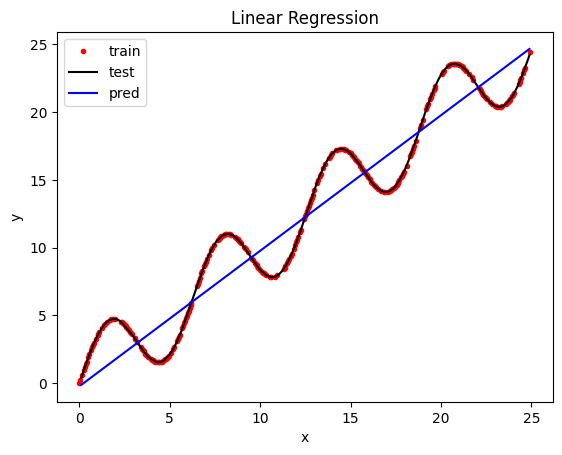

In [62]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
    plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'b')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()